## Predicting Wine Type

- practicing accumulating loss and accuracy changes for each epoch
- practice early stopping

In [1]:
import pandas as pd

In [2]:
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df_pre.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
#원본데이터의 얼마를 사용할 것인가, 랜덤으로 뽑아옴
df = df_pre.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
258,7.7,0.41,0.76,1.80,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5,1
568,9.8,0.50,0.49,2.60,0.250,5.0,20.0,0.99900,3.31,0.79,10.7,6,1
4865,8.1,0.24,0.32,10.50,0.030,34.0,105.0,0.99407,3.11,0.42,11.8,6,0
4585,6.7,0.18,0.28,10.20,0.039,29.0,115.0,0.99469,3.11,0.45,10.9,7,0
2009,7.2,0.25,0.39,18.95,0.038,42.0,155.0,0.99990,2.97,0.47,9.0,6,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 258 to 4580
Data columns (total 13 columns):
0     6497 non-null float64
1     6497 non-null float64
2     6497 non-null float64
3     6497 non-null float64
4     6497 non-null float64
5     6497 non-null float64
6     6497 non-null float64
7     6497 non-null float64
8     6497 non-null float64
9     6497 non-null float64
10    6497 non-null float64
11    6497 non-null int64
12    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


## columns :

0: 주석산 농도  
1: 아세트산 농도  
2: 구연산 농도  
3: 잔류 당분 농도  
4: 염화나트륨 농도   
5: 유리 아황산 농도  
6: 총 아황산 농도  
7: 밀도  
8: pH  
9: 황산칼륨 농도  
10: 알코올 도수  
11: 와인 맛(0-10등급)  
12: class(1: 레드와인, 0:화이트)

In [5]:
X = df.values[:, 0:12]
Y = df.values[:, 12]

### Model
- binary classification

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/grace/workspace/keras/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/grace/workspace/keras/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [7]:
seed= 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [8]:
model = Sequential()

model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
model.fit(X, Y, \
          validation_split=0.2, \
          epochs=200, batch_size=200)

Train on 5197 samples, validate on 1300 samples
Epoch 1/200
5197/5197 [==============================] - 0s - loss: 0.5749 - acc: 0.8014 - val_loss: 0.3416 - val_acc: 0.8892
Epoch 2/200
5197/5197 [==============================] - 0s - loss: 0.2891 - acc: 0.9003 - val_loss: 0.2823 - val_acc: 0.9154
Epoch 3/200
5197/5197 [==============================] - 0s - loss: 0.2560 - acc: 0.9190 - val_loss: 0.2605 - val_acc: 0.9231
Epoch 4/200
5197/5197 [==============================] - 0s - loss: 0.2407 - acc: 0.9255 - val_loss: 0.2455 - val_acc: 0.9262
Epoch 5/200
5197/5197 [==============================] - 0s - loss: 0.2271 - acc: 0.9292 - val_loss: 0.2349 - val_acc: 0.9269
Epoch 6/200
5197/5197 [==============================] - 0s - loss: 0.2179 - acc: 0.9315 - val_loss: 0.2309 - val_acc: 0.9285
Epoch 7/200
5197/5197 [==============================] - 0s - loss: 0.2109 - acc: 0.9317 - val_loss: 0.2216 - val_acc: 0.9315
Epoch 8/200
5197/5197 [==============================] - 0s - loss: 0.

5197/5197 [==============================] - 0s - loss: 0.0835 - acc: 0.9733 - val_loss: 0.1052 - val_acc: 0.9723
Epoch 66/200
5197/5197 [==============================] - 0s - loss: 0.0795 - acc: 0.9731 - val_loss: 0.1058 - val_acc: 0.9700
Epoch 67/200
5197/5197 [==============================] - 0s - loss: 0.0774 - acc: 0.9746 - val_loss: 0.1062 - val_acc: 0.9738
Epoch 68/200
5197/5197 [==============================] - 0s - loss: 0.0818 - acc: 0.9742 - val_loss: 0.1106 - val_acc: 0.9692
Epoch 69/200
5197/5197 [==============================] - 0s - loss: 0.0756 - acc: 0.9769 - val_loss: 0.1115 - val_acc: 0.9700
Epoch 70/200
5197/5197 [==============================] - 0s - loss: 0.0804 - acc: 0.9752 - val_loss: 0.1072 - val_acc: 0.9723
Epoch 71/200
5197/5197 [==============================] - 0s - loss: 0.0752 - acc: 0.9750 - val_loss: 0.1028 - val_acc: 0.9738
Epoch 72/200
5197/5197 [==============================] - 0s - loss: 0.0742 - acc: 0.9756 - val_loss: 0.1092 - val_acc: 0.97

5197/5197 [==============================] - 0s - loss: 0.0597 - acc: 0.9827 - val_loss: 0.1002 - val_acc: 0.9769
Epoch 130/200
5197/5197 [==============================] - 0s - loss: 0.0572 - acc: 0.9833 - val_loss: 0.0862 - val_acc: 0.9846
Epoch 131/200
5197/5197 [==============================] - 0s - loss: 0.0536 - acc: 0.9840 - val_loss: 0.0922 - val_acc: 0.9800
Epoch 132/200
5197/5197 [==============================] - 0s - loss: 0.0533 - acc: 0.9863 - val_loss: 0.0865 - val_acc: 0.9831
Epoch 133/200
5197/5197 [==============================] - 0s - loss: 0.0540 - acc: 0.9842 - val_loss: 0.0862 - val_acc: 0.9831
Epoch 134/200
5197/5197 [==============================] - 0s - loss: 0.0529 - acc: 0.9848 - val_loss: 0.0870 - val_acc: 0.9838
Epoch 135/200
5197/5197 [==============================] - 0s - loss: 0.0523 - acc: 0.9852 - val_loss: 0.0857 - val_acc: 0.9823
Epoch 136/200
5197/5197 [==============================] - 0s - loss: 0.0525 - acc: 0.9852 - val_loss: 0.0852 - val_ac

5197/5197 [==============================] - 0s - loss: 0.0488 - acc: 0.9861 - val_loss: 0.0808 - val_acc: 0.9831
Epoch 194/200
5197/5197 [==============================] - 0s - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0819 - val_acc: 0.9838
Epoch 195/200
5197/5197 [==============================] - 0s - loss: 0.0483 - acc: 0.9865 - val_loss: 0.0928 - val_acc: 0.9792
Epoch 196/200
5197/5197 [==============================] - 0s - loss: 0.0496 - acc: 0.9846 - val_loss: 0.0806 - val_acc: 0.9838
Epoch 197/200
5197/5197 [==============================] - 0s - loss: 0.0487 - acc: 0.9852 - val_loss: 0.0811 - val_acc: 0.9846
Epoch 198/200
5197/5197 [==============================] - 0s - loss: 0.0479 - acc: 0.9860 - val_loss: 0.0861 - val_acc: 0.9808
Epoch 199/200
5197/5197 [==============================] - 0s - loss: 0.0482 - acc: 0.9863 - val_loss: 0.0892 - val_acc: 0.9800
Epoch 200/200
5197/5197 [==============================] - 0s - loss: 0.0484 - acc: 0.9844 - val_loss: 0.0808 - val_ac

## If want to save model for every epoch

In [11]:
import os

MODEL_DIR = './epoch_model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
model_path = './epoch_model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [12]:
check_pointer = ModelCheckpoint(filepath=model_path,\
                               monitor='val_loss',\
                               verbose=1)

In [13]:
# model.fit(X, Y, \
#           validation_split=0.2, \
#           epochs=50, \
#           batch_size=200, \
#           verbose=0, \
#           callbacks=[check_pointer])

# ## 만약 앞선 모델보다 나아졌을 때마 저장하게 하려면 save_best_only=True

## 에포크 : 
- 학습을 반복하는 횟수가 너무 적어도 안되고 너무 많아도 과적합을 일으킴으로...

In [14]:
sample = df_pre.sample(frac=0.15)
s_X = sample.values[:, 0:12]
s_Y = sample.values[:, 12]

s_model = Sequential()

s_model.add(Dense(30, input_dim=12, activation='relu'))
s_model.add(Dense(12, activation='relu'))
s_model.add(Dense(8, activation='relu'))
s_model.add(Dense(1, activation='sigmoid'))

s_model.compile(loss='binary_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

history = s_model.fit(s_X, s_Y, validation_split=0.33,\
                   epochs=3500,\
                   batch_size=500)

Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 0s - loss: 0.6285 - acc: 0.8025 - val_loss: 0.4941 - val_acc: 0.8168
Epoch 2/3500
653/653 [==============================] - 0s - loss: 0.4788 - acc: 0.8300 - val_loss: 0.3589 - val_acc: 0.8975
Epoch 3/3500
653/653 [==============================] - 0s - loss: 0.3685 - acc: 0.8775 - val_loss: 0.3029 - val_acc: 0.9161
Epoch 4/3500
653/653 [==============================] - 0s - loss: 0.3595 - acc: 0.8821 - val_loss: 0.3057 - val_acc: 0.9224
Epoch 5/3500
653/653 [==============================] - 0s - loss: 0.3834 - acc: 0.8576 - val_loss: 0.2889 - val_acc: 0.9224
Epoch 6/3500
653/653 [==============================] - 0s - loss: 0.3474 - acc: 0.8760 - val_loss: 0.2722 - val_acc: 0.9224
Epoch 7/3500
653/653 [==============================] - 0s - loss: 0.3087 - acc: 0.8974 - val_loss: 0.2731 - val_acc: 0.9255
Epoch 8/3500
653/653 [==============================] - 0s - loss: 0.2906 - acc

653/653 [==============================] - 0s - loss: 0.2016 - acc: 0.9250 - val_loss: 0.1784 - val_acc: 0.9286
Epoch 66/3500
653/653 [==============================] - 0s - loss: 0.2023 - acc: 0.9280 - val_loss: 0.1802 - val_acc: 0.9255
Epoch 67/3500
653/653 [==============================] - 0s - loss: 0.2019 - acc: 0.9311 - val_loss: 0.1768 - val_acc: 0.9286
Epoch 68/3500
653/653 [==============================] - 0s - loss: 0.2004 - acc: 0.9265 - val_loss: 0.1750 - val_acc: 0.9286
Epoch 69/3500
653/653 [==============================] - 0s - loss: 0.1997 - acc: 0.9265 - val_loss: 0.1748 - val_acc: 0.9286
Epoch 70/3500
653/653 [==============================] - 0s - loss: 0.2004 - acc: 0.9250 - val_loss: 0.1737 - val_acc: 0.9286
Epoch 71/3500
653/653 [==============================] - 0s - loss: 0.2000 - acc: 0.9234 - val_loss: 0.1723 - val_acc: 0.9286
Epoch 72/3500
653/653 [==============================] - 0s - loss: 0.1979 - acc: 0.9265 - val_loss: 0.1712 - val_acc: 0.9286
Epoch 

653/653 [==============================] - 0s - loss: 0.1724 - acc: 0.9372 - val_loss: 0.1445 - val_acc: 0.9410
Epoch 130/3500
653/653 [==============================] - 0s - loss: 0.1720 - acc: 0.9387 - val_loss: 0.1444 - val_acc: 0.9379
Epoch 131/3500
653/653 [==============================] - 0s - loss: 0.1707 - acc: 0.9342 - val_loss: 0.1445 - val_acc: 0.9379
Epoch 132/3500
653/653 [==============================] - 0s - loss: 0.1703 - acc: 0.9342 - val_loss: 0.1436 - val_acc: 0.9379
Epoch 133/3500
653/653 [==============================] - 0s - loss: 0.1692 - acc: 0.9342 - val_loss: 0.1433 - val_acc: 0.9379
Epoch 134/3500
653/653 [==============================] - 0s - loss: 0.1693 - acc: 0.9342 - val_loss: 0.1416 - val_acc: 0.9379
Epoch 135/3500
653/653 [==============================] - 0s - loss: 0.1695 - acc: 0.9372 - val_loss: 0.1411 - val_acc: 0.9441
Epoch 136/3500
653/653 [==============================] - 0s - loss: 0.1685 - acc: 0.9403 - val_loss: 0.1408 - val_acc: 0.9410

653/653 [==============================] - 0s - loss: 0.1371 - acc: 0.9449 - val_loss: 0.1093 - val_acc: 0.9503
Epoch 194/3500
653/653 [==============================] - 0s - loss: 0.1335 - acc: 0.9449 - val_loss: 0.1145 - val_acc: 0.9534
Epoch 195/3500
653/653 [==============================] - 0s - loss: 0.1383 - acc: 0.9495 - val_loss: 0.1099 - val_acc: 0.9503
Epoch 196/3500
653/653 [==============================] - 0s - loss: 0.1334 - acc: 0.9449 - val_loss: 0.1113 - val_acc: 0.9441
Epoch 197/3500
653/653 [==============================] - 0s - loss: 0.1339 - acc: 0.9433 - val_loss: 0.1085 - val_acc: 0.9441
Epoch 198/3500
653/653 [==============================] - 0s - loss: 0.1316 - acc: 0.9449 - val_loss: 0.1067 - val_acc: 0.9534
Epoch 199/3500
653/653 [==============================] - 0s - loss: 0.1318 - acc: 0.9495 - val_loss: 0.1058 - val_acc: 0.9503
Epoch 200/3500
653/653 [==============================] - 0s - loss: 0.1310 - acc: 0.9495 - val_loss: 0.1068 - val_acc: 0.9441

653/653 [==============================] - 0s - loss: 0.0945 - acc: 0.9694 - val_loss: 0.0753 - val_acc: 0.9720
Epoch 258/3500
653/653 [==============================] - 0s - loss: 0.1007 - acc: 0.9587 - val_loss: 0.0725 - val_acc: 0.9689
Epoch 259/3500
653/653 [==============================] - 0s - loss: 0.0949 - acc: 0.9709 - val_loss: 0.0834 - val_acc: 0.9689
Epoch 260/3500
653/653 [==============================] - 0s - loss: 0.0999 - acc: 0.9632 - val_loss: 0.0720 - val_acc: 0.9720
Epoch 261/3500
653/653 [==============================] - 0s - loss: 0.0918 - acc: 0.9694 - val_loss: 0.0754 - val_acc: 0.9658
Epoch 262/3500
653/653 [==============================] - 0s - loss: 0.0985 - acc: 0.9617 - val_loss: 0.0718 - val_acc: 0.9689
Epoch 263/3500
653/653 [==============================] - 0s - loss: 0.0944 - acc: 0.9694 - val_loss: 0.0742 - val_acc: 0.9689
Epoch 264/3500
653/653 [==============================] - 0s - loss: 0.0917 - acc: 0.9709 - val_loss: 0.0721 - val_acc: 0.9689

653/653 [==============================] - 0s - loss: 0.0777 - acc: 0.9786 - val_loss: 0.0583 - val_acc: 0.9783
Epoch 322/3500
653/653 [==============================] - 0s - loss: 0.0761 - acc: 0.9755 - val_loss: 0.0576 - val_acc: 0.9845
Epoch 323/3500
653/653 [==============================] - 0s - loss: 0.0779 - acc: 0.9740 - val_loss: 0.0581 - val_acc: 0.9783
Epoch 324/3500
653/653 [==============================] - 0s - loss: 0.0753 - acc: 0.9801 - val_loss: 0.0587 - val_acc: 0.9783
Epoch 325/3500
653/653 [==============================] - 0s - loss: 0.0751 - acc: 0.9801 - val_loss: 0.0570 - val_acc: 0.9814
Epoch 326/3500
653/653 [==============================] - 0s - loss: 0.0752 - acc: 0.9755 - val_loss: 0.0566 - val_acc: 0.9876
Epoch 327/3500
653/653 [==============================] - 0s - loss: 0.0752 - acc: 0.9755 - val_loss: 0.0594 - val_acc: 0.9783
Epoch 328/3500
653/653 [==============================] - 0s - loss: 0.0754 - acc: 0.9816 - val_loss: 0.0597 - val_acc: 0.9752

653/653 [==============================] - 0s - loss: 0.0662 - acc: 0.9770 - val_loss: 0.0465 - val_acc: 0.9876
Epoch 386/3500
653/653 [==============================] - 0s - loss: 0.0640 - acc: 0.9832 - val_loss: 0.0448 - val_acc: 0.9907
Epoch 387/3500
653/653 [==============================] - 0s - loss: 0.0641 - acc: 0.9816 - val_loss: 0.0445 - val_acc: 0.9907
Epoch 388/3500
653/653 [==============================] - 0s - loss: 0.0638 - acc: 0.9832 - val_loss: 0.0474 - val_acc: 0.9907
Epoch 389/3500
653/653 [==============================] - 0s - loss: 0.0640 - acc: 0.9832 - val_loss: 0.0471 - val_acc: 0.9938
Epoch 390/3500
653/653 [==============================] - 0s - loss: 0.0638 - acc: 0.9832 - val_loss: 0.0517 - val_acc: 0.9845
Epoch 391/3500
653/653 [==============================] - 0s - loss: 0.0652 - acc: 0.9832 - val_loss: 0.0473 - val_acc: 0.9876
Epoch 392/3500
653/653 [==============================] - 0s - loss: 0.0629 - acc: 0.9832 - val_loss: 0.0441 - val_acc: 0.9907

653/653 [==============================] - 0s - loss: 0.0564 - acc: 0.9862 - val_loss: 0.0388 - val_acc: 0.9969
Epoch 450/3500
653/653 [==============================] - 0s - loss: 0.0566 - acc: 0.9847 - val_loss: 0.0406 - val_acc: 0.9969
Epoch 451/3500
653/653 [==============================] - 0s - loss: 0.0556 - acc: 0.9862 - val_loss: 0.0397 - val_acc: 0.9969
Epoch 452/3500
653/653 [==============================] - 0s - loss: 0.0556 - acc: 0.9862 - val_loss: 0.0417 - val_acc: 0.9938
Epoch 453/3500
653/653 [==============================] - 0s - loss: 0.0548 - acc: 0.9862 - val_loss: 0.0454 - val_acc: 0.9845
Epoch 454/3500
653/653 [==============================] - 0s - loss: 0.0555 - acc: 0.9862 - val_loss: 0.0407 - val_acc: 0.9938
Epoch 455/3500
653/653 [==============================] - 0s - loss: 0.0555 - acc: 0.9862 - val_loss: 0.0387 - val_acc: 0.9969
Epoch 456/3500
653/653 [==============================] - 0s - loss: 0.0571 - acc: 0.9862 - val_loss: 0.0394 - val_acc: 0.9969

653/653 [==============================] - 0s - loss: 0.0492 - acc: 0.9877 - val_loss: 0.0346 - val_acc: 0.9969
Epoch 514/3500
653/653 [==============================] - 0s - loss: 0.0493 - acc: 0.9877 - val_loss: 0.0332 - val_acc: 0.9969
Epoch 515/3500
653/653 [==============================] - 0s - loss: 0.0498 - acc: 0.9877 - val_loss: 0.0380 - val_acc: 0.9938
Epoch 516/3500
653/653 [==============================] - 0s - loss: 0.0488 - acc: 0.9877 - val_loss: 0.0382 - val_acc: 0.9907
Epoch 517/3500
653/653 [==============================] - 0s - loss: 0.0485 - acc: 0.9877 - val_loss: 0.0335 - val_acc: 0.9969
Epoch 518/3500
653/653 [==============================] - 0s - loss: 0.0495 - acc: 0.9877 - val_loss: 0.0345 - val_acc: 0.9969
Epoch 519/3500
653/653 [==============================] - 0s - loss: 0.0484 - acc: 0.9862 - val_loss: 0.0425 - val_acc: 0.9907
Epoch 520/3500
653/653 [==============================] - 0s - loss: 0.0493 - acc: 0.9832 - val_loss: 0.0370 - val_acc: 0.9938

653/653 [==============================] - 0s - loss: 0.0499 - acc: 0.9862 - val_loss: 0.0459 - val_acc: 0.9845
Epoch 578/3500
653/653 [==============================] - 0s - loss: 0.0452 - acc: 0.9847 - val_loss: 0.0295 - val_acc: 0.9938
Epoch 579/3500
653/653 [==============================] - 0s - loss: 0.0518 - acc: 0.9862 - val_loss: 0.0288 - val_acc: 0.9969
Epoch 580/3500
653/653 [==============================] - 0s - loss: 0.0450 - acc: 0.9908 - val_loss: 0.0471 - val_acc: 0.9814
Epoch 581/3500
653/653 [==============================] - 0s - loss: 0.0468 - acc: 0.9877 - val_loss: 0.0445 - val_acc: 0.9845
Epoch 582/3500
653/653 [==============================] - 0s - loss: 0.0448 - acc: 0.9862 - val_loss: 0.0280 - val_acc: 0.9969
Epoch 583/3500
653/653 [==============================] - 0s - loss: 0.0474 - acc: 0.9893 - val_loss: 0.0289 - val_acc: 0.9969
Epoch 584/3500
653/653 [==============================] - 0s - loss: 0.0446 - acc: 0.9893 - val_loss: 0.0461 - val_acc: 0.9845

653/653 [==============================] - 0s - loss: 0.0402 - acc: 0.9877 - val_loss: 0.0453 - val_acc: 0.9845
Epoch 642/3500
653/653 [==============================] - 0s - loss: 0.0446 - acc: 0.9877 - val_loss: 0.0290 - val_acc: 0.9969
Epoch 643/3500
653/653 [==============================] - 0s - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0251 - val_acc: 0.9969
Epoch 644/3500
653/653 [==============================] - 0s - loss: 0.0421 - acc: 0.9877 - val_loss: 0.0264 - val_acc: 0.9969
Epoch 645/3500
653/653 [==============================] - 0s - loss: 0.0402 - acc: 0.9877 - val_loss: 0.0295 - val_acc: 0.9938
Epoch 646/3500
653/653 [==============================] - 0s - loss: 0.0389 - acc: 0.9893 - val_loss: 0.0404 - val_acc: 0.9876
Epoch 647/3500
653/653 [==============================] - 0s - loss: 0.0413 - acc: 0.9877 - val_loss: 0.0420 - val_acc: 0.9876
Epoch 648/3500
653/653 [==============================] - 0s - loss: 0.0407 - acc: 0.9893 - val_loss: 0.0266 - val_acc: 0.9969

653/653 [==============================] - 0s - loss: 0.0415 - acc: 0.9908 - val_loss: 0.0327 - val_acc: 0.9969
Epoch 706/3500
653/653 [==============================] - 0s - loss: 0.0373 - acc: 0.9877 - val_loss: 0.0455 - val_acc: 0.9876
Epoch 707/3500
653/653 [==============================] - 0s - loss: 0.0391 - acc: 0.9893 - val_loss: 0.0240 - val_acc: 0.9969
Epoch 708/3500
653/653 [==============================] - 0s - loss: 0.0398 - acc: 0.9893 - val_loss: 0.0232 - val_acc: 0.9938
Epoch 709/3500
653/653 [==============================] - 0s - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0296 - val_acc: 0.9969
Epoch 710/3500
653/653 [==============================] - 0s - loss: 0.0353 - acc: 0.9893 - val_loss: 0.0473 - val_acc: 0.9783
Epoch 711/3500
653/653 [==============================] - 0s - loss: 0.0420 - acc: 0.9877 - val_loss: 0.0320 - val_acc: 0.9969
Epoch 712/3500
653/653 [==============================] - 0s - loss: 0.0355 - acc: 0.9908 - val_loss: 0.0228 - val_acc: 0.9969

653/653 [==============================] - 0s - loss: 0.0366 - acc: 0.9908 - val_loss: 0.0401 - val_acc: 0.9876
Epoch 770/3500
653/653 [==============================] - 0s - loss: 0.0367 - acc: 0.9893 - val_loss: 0.0245 - val_acc: 0.9969
Epoch 771/3500
653/653 [==============================] - 0s - loss: 0.0355 - acc: 0.9877 - val_loss: 0.0268 - val_acc: 0.9969
Epoch 772/3500
653/653 [==============================] - 0s - loss: 0.0345 - acc: 0.9893 - val_loss: 0.0400 - val_acc: 0.9845
Epoch 773/3500
653/653 [==============================] - 0s - loss: 0.0359 - acc: 0.9877 - val_loss: 0.0343 - val_acc: 0.9907
Epoch 774/3500
653/653 [==============================] - 0s - loss: 0.0340 - acc: 0.9908 - val_loss: 0.0272 - val_acc: 0.9969
Epoch 775/3500
653/653 [==============================] - 0s - loss: 0.0360 - acc: 0.9877 - val_loss: 0.0302 - val_acc: 0.9938
Epoch 776/3500
653/653 [==============================] - 0s - loss: 0.0345 - acc: 0.9908 - val_loss: 0.0419 - val_acc: 0.9845

653/653 [==============================] - 0s - loss: 0.0331 - acc: 0.9923 - val_loss: 0.0303 - val_acc: 0.9938
Epoch 834/3500
653/653 [==============================] - 0s - loss: 0.0323 - acc: 0.9893 - val_loss: 0.0270 - val_acc: 0.9969
Epoch 835/3500
653/653 [==============================] - 0s - loss: 0.0316 - acc: 0.9893 - val_loss: 0.0327 - val_acc: 0.9907
Epoch 836/3500
653/653 [==============================] - 0s - loss: 0.0317 - acc: 0.9923 - val_loss: 0.0339 - val_acc: 0.9845
Epoch 837/3500
653/653 [==============================] - 0s - loss: 0.0322 - acc: 0.9923 - val_loss: 0.0273 - val_acc: 0.9969
Epoch 838/3500
653/653 [==============================] - 0s - loss: 0.0324 - acc: 0.9908 - val_loss: 0.0250 - val_acc: 0.9969
Epoch 839/3500
653/653 [==============================] - 0s - loss: 0.0328 - acc: 0.9893 - val_loss: 0.0362 - val_acc: 0.9876
Epoch 840/3500
653/653 [==============================] - 0s - loss: 0.0323 - acc: 0.9923 - val_loss: 0.0375 - val_acc: 0.9845

653/653 [==============================] - 0s - loss: 0.0327 - acc: 0.9893 - val_loss: 0.0409 - val_acc: 0.9876
Epoch 898/3500
653/653 [==============================] - 0s - loss: 0.0340 - acc: 0.9908 - val_loss: 0.0254 - val_acc: 0.9938
Epoch 899/3500
653/653 [==============================] - 0s - loss: 0.0312 - acc: 0.9893 - val_loss: 0.0231 - val_acc: 0.9969
Epoch 900/3500
653/653 [==============================] - 0s - loss: 0.0316 - acc: 0.9893 - val_loss: 0.0325 - val_acc: 0.9907
Epoch 901/3500
653/653 [==============================] - 0s - loss: 0.0305 - acc: 0.9923 - val_loss: 0.0424 - val_acc: 0.9783
Epoch 902/3500
653/653 [==============================] - 0s - loss: 0.0325 - acc: 0.9877 - val_loss: 0.0264 - val_acc: 0.9938
Epoch 903/3500
653/653 [==============================] - 0s - loss: 0.0341 - acc: 0.9908 - val_loss: 0.0231 - val_acc: 0.9969
Epoch 904/3500
653/653 [==============================] - 0s - loss: 0.0346 - acc: 0.9908 - val_loss: 0.0356 - val_acc: 0.9907

653/653 [==============================] - 0s - loss: 0.0282 - acc: 0.9923 - val_loss: 0.0314 - val_acc: 0.9938
Epoch 962/3500
653/653 [==============================] - 0s - loss: 0.0282 - acc: 0.9923 - val_loss: 0.0302 - val_acc: 0.9938
Epoch 963/3500
653/653 [==============================] - 0s - loss: 0.0281 - acc: 0.9923 - val_loss: 0.0329 - val_acc: 0.9938
Epoch 964/3500
653/653 [==============================] - 0s - loss: 0.0291 - acc: 0.9908 - val_loss: 0.0345 - val_acc: 0.9907
Epoch 965/3500
653/653 [==============================] - 0s - loss: 0.0290 - acc: 0.9923 - val_loss: 0.0337 - val_acc: 0.9907
Epoch 966/3500
653/653 [==============================] - 0s - loss: 0.0283 - acc: 0.9923 - val_loss: 0.0261 - val_acc: 0.9938
Epoch 967/3500
653/653 [==============================] - 0s - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0291 - val_acc: 0.9938
Epoch 968/3500
653/653 [==============================] - 0s - loss: 0.0277 - acc: 0.9939 - val_loss: 0.0329 - val_acc: 0.9907

653/653 [==============================] - 0s - loss: 0.0291 - acc: 0.9893 - val_loss: 0.0342 - val_acc: 0.9938
Epoch 1026/3500
653/653 [==============================] - 0s - loss: 0.0268 - acc: 0.9939 - val_loss: 0.0428 - val_acc: 0.9845
Epoch 1027/3500
653/653 [==============================] - 0s - loss: 0.0278 - acc: 0.9923 - val_loss: 0.0292 - val_acc: 0.9938
Epoch 1028/3500
653/653 [==============================] - 0s - loss: 0.0268 - acc: 0.9908 - val_loss: 0.0256 - val_acc: 0.9938
Epoch 1029/3500
653/653 [==============================] - 0s - loss: 0.0283 - acc: 0.9893 - val_loss: 0.0380 - val_acc: 0.9845
Epoch 1030/3500
653/653 [==============================] - 0s - loss: 0.0271 - acc: 0.9923 - val_loss: 0.0523 - val_acc: 0.9814
Epoch 1031/3500
653/653 [==============================] - 0s - loss: 0.0312 - acc: 0.9908 - val_loss: 0.0267 - val_acc: 0.9938
Epoch 1032/3500
653/653 [==============================] - 0s - loss: 0.0288 - acc: 0.9893 - val_loss: 0.0245 - val_acc:

653/653 [==============================] - 0s - loss: 0.0276 - acc: 0.9923 - val_loss: 0.0260 - val_acc: 0.9938
Epoch 1090/3500
653/653 [==============================] - 0s - loss: 0.0284 - acc: 0.9893 - val_loss: 0.0301 - val_acc: 0.9938
Epoch 1091/3500
653/653 [==============================] - 0s - loss: 0.0258 - acc: 0.9923 - val_loss: 0.0473 - val_acc: 0.9845
Epoch 1092/3500
653/653 [==============================] - 0s - loss: 0.0277 - acc: 0.9923 - val_loss: 0.0354 - val_acc: 0.9938
Epoch 1093/3500
653/653 [==============================] - 0s - loss: 0.0244 - acc: 0.9939 - val_loss: 0.0264 - val_acc: 0.9938
Epoch 1094/3500
653/653 [==============================] - 0s - loss: 0.0263 - acc: 0.9908 - val_loss: 0.0274 - val_acc: 0.9938
Epoch 1095/3500
653/653 [==============================] - 0s - loss: 0.0255 - acc: 0.9923 - val_loss: 0.0427 - val_acc: 0.9845
Epoch 1096/3500
653/653 [==============================] - 0s - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0394 - val_acc:

653/653 [==============================] - 0s - loss: 0.0280 - acc: 0.9893 - val_loss: 0.0321 - val_acc: 0.9938
Epoch 1153/3500
653/653 [==============================] - 0s - loss: 0.0243 - acc: 0.9939 - val_loss: 0.0407 - val_acc: 0.9876
Epoch 1154/3500
653/653 [==============================] - 0s - loss: 0.0241 - acc: 0.9939 - val_loss: 0.0297 - val_acc: 0.9938
Epoch 1155/3500
653/653 [==============================] - 0s - loss: 0.0247 - acc: 0.9939 - val_loss: 0.0264 - val_acc: 0.9938
Epoch 1156/3500
653/653 [==============================] - 0s - loss: 0.0271 - acc: 0.9923 - val_loss: 0.0313 - val_acc: 0.9938
Epoch 1157/3500
653/653 [==============================] - 0s - loss: 0.0250 - acc: 0.9939 - val_loss: 0.0305 - val_acc: 0.9938
Epoch 1158/3500
653/653 [==============================] - 0s - loss: 0.0243 - acc: 0.9939 - val_loss: 0.0282 - val_acc: 0.9938
Epoch 1159/3500
653/653 [==============================] - 0s - loss: 0.0254 - acc: 0.9923 - val_loss: 0.0311 - val_acc:

653/653 [==============================] - 0s - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0261 - val_acc: 0.9907
Epoch 1217/3500
653/653 [==============================] - 0s - loss: 0.0382 - acc: 0.9816 - val_loss: 0.0389 - val_acc: 0.9907
Epoch 1218/3500
653/653 [==============================] - 0s - loss: 0.0299 - acc: 0.9893 - val_loss: 0.0573 - val_acc: 0.9752
Epoch 1219/3500
653/653 [==============================] - 0s - loss: 0.0303 - acc: 0.9908 - val_loss: 0.0251 - val_acc: 0.9938
Epoch 1220/3500
653/653 [==============================] - 0s - loss: 0.0310 - acc: 0.9893 - val_loss: 0.0281 - val_acc: 0.9938
Epoch 1221/3500
653/653 [==============================] - 0s - loss: 0.0249 - acc: 0.9923 - val_loss: 0.0556 - val_acc: 0.9814
Epoch 1222/3500
653/653 [==============================] - 0s - loss: 0.0301 - acc: 0.9908 - val_loss: 0.0350 - val_acc: 0.9907
Epoch 1223/3500
653/653 [==============================] - 0s - loss: 0.0256 - acc: 0.9908 - val_loss: 0.0255 - val_acc:

653/653 [==============================] - 0s - loss: 0.0216 - acc: 0.9939 - val_loss: 0.0379 - val_acc: 0.9938
Epoch 1281/3500
653/653 [==============================] - 0s - loss: 0.0219 - acc: 0.9939 - val_loss: 0.0378 - val_acc: 0.9938
Epoch 1282/3500
653/653 [==============================] - 0s - loss: 0.0221 - acc: 0.9923 - val_loss: 0.0367 - val_acc: 0.9938
Epoch 1283/3500
653/653 [==============================] - 0s - loss: 0.0219 - acc: 0.9939 - val_loss: 0.0384 - val_acc: 0.9938
Epoch 1284/3500
653/653 [==============================] - 0s - loss: 0.0214 - acc: 0.9939 - val_loss: 0.0358 - val_acc: 0.9938
Epoch 1285/3500
653/653 [==============================] - 0s - loss: 0.0217 - acc: 0.9939 - val_loss: 0.0370 - val_acc: 0.9938
Epoch 1286/3500
653/653 [==============================] - 0s - loss: 0.0219 - acc: 0.9939 - val_loss: 0.0421 - val_acc: 0.9876
Epoch 1287/3500
653/653 [==============================] - 0s - loss: 0.0217 - acc: 0.9939 - val_loss: 0.0402 - val_acc:

653/653 [==============================] - 0s - loss: 0.0239 - acc: 0.9908 - val_loss: 0.0417 - val_acc: 0.9938
Epoch 1345/3500
653/653 [==============================] - 0s - loss: 0.0207 - acc: 0.9939 - val_loss: 0.0496 - val_acc: 0.9845
Epoch 1346/3500
653/653 [==============================] - 0s - loss: 0.0225 - acc: 0.9923 - val_loss: 0.0390 - val_acc: 0.9938
Epoch 1347/3500
653/653 [==============================] - 0s - loss: 0.0209 - acc: 0.9923 - val_loss: 0.0303 - val_acc: 0.9938
Epoch 1348/3500
653/653 [==============================] - 0s - loss: 0.0250 - acc: 0.9908 - val_loss: 0.0367 - val_acc: 0.9938
Epoch 1349/3500
653/653 [==============================] - 0s - loss: 0.0209 - acc: 0.9939 - val_loss: 0.0457 - val_acc: 0.9876
Epoch 1350/3500
653/653 [==============================] - 0s - loss: 0.0210 - acc: 0.9939 - val_loss: 0.0416 - val_acc: 0.9907
Epoch 1351/3500
653/653 [==============================] - 0s - loss: 0.0202 - acc: 0.9939 - val_loss: 0.0328 - val_acc:

653/653 [==============================] - 0s - loss: 0.0213 - acc: 0.9923 - val_loss: 0.0414 - val_acc: 0.9938
Epoch 1409/3500
653/653 [==============================] - 0s - loss: 0.0201 - acc: 0.9939 - val_loss: 0.0379 - val_acc: 0.9938
Epoch 1410/3500
653/653 [==============================] - 0s - loss: 0.0197 - acc: 0.9939 - val_loss: 0.0335 - val_acc: 0.9938
Epoch 1411/3500
653/653 [==============================] - 0s - loss: 0.0215 - acc: 0.9939 - val_loss: 0.0450 - val_acc: 0.9876
Epoch 1412/3500
653/653 [==============================] - 0s - loss: 0.0207 - acc: 0.9939 - val_loss: 0.0643 - val_acc: 0.9752
Epoch 1413/3500
653/653 [==============================] - 0s - loss: 0.0244 - acc: 0.9939 - val_loss: 0.0400 - val_acc: 0.9938
Epoch 1414/3500
653/653 [==============================] - 0s - loss: 0.0202 - acc: 0.9939 - val_loss: 0.0349 - val_acc: 0.9938
Epoch 1415/3500
653/653 [==============================] - 0s - loss: 0.0215 - acc: 0.9923 - val_loss: 0.0443 - val_acc:

653/653 [==============================] - 0s - loss: 0.0215 - acc: 0.9954 - val_loss: 0.0554 - val_acc: 0.9814
Epoch 1473/3500
653/653 [==============================] - 0s - loss: 0.0208 - acc: 0.9939 - val_loss: 0.0370 - val_acc: 0.9938
Epoch 1474/3500
653/653 [==============================] - 0s - loss: 0.0211 - acc: 0.9923 - val_loss: 0.0360 - val_acc: 0.9938
Epoch 1475/3500
653/653 [==============================] - 0s - loss: 0.0200 - acc: 0.9923 - val_loss: 0.0485 - val_acc: 0.9876
Epoch 1476/3500
653/653 [==============================] - 0s - loss: 0.0200 - acc: 0.9954 - val_loss: 0.0492 - val_acc: 0.9876
Epoch 1477/3500
653/653 [==============================] - 0s - loss: 0.0196 - acc: 0.9954 - val_loss: 0.0363 - val_acc: 0.9938
Epoch 1478/3500
653/653 [==============================] - 0s - loss: 0.0206 - acc: 0.9954 - val_loss: 0.0354 - val_acc: 0.9938
Epoch 1479/3500
653/653 [==============================] - 0s - loss: 0.0218 - acc: 0.9923 - val_loss: 0.0416 - val_acc:

653/653 [==============================] - 0s - loss: 0.0185 - acc: 0.9939 - val_loss: 0.0431 - val_acc: 0.9938
Epoch 1536/3500
653/653 [==============================] - 0s - loss: 0.0181 - acc: 0.9954 - val_loss: 0.0459 - val_acc: 0.9876
Epoch 1537/3500
653/653 [==============================] - 0s - loss: 0.0181 - acc: 0.9954 - val_loss: 0.0508 - val_acc: 0.9876
Epoch 1538/3500
653/653 [==============================] - 0s - loss: 0.0187 - acc: 0.9954 - val_loss: 0.0476 - val_acc: 0.9876
Epoch 1539/3500
653/653 [==============================] - 0s - loss: 0.0189 - acc: 0.9954 - val_loss: 0.0399 - val_acc: 0.9938
Epoch 1540/3500
653/653 [==============================] - 0s - loss: 0.0186 - acc: 0.9939 - val_loss: 0.0452 - val_acc: 0.9907
Epoch 1541/3500
653/653 [==============================] - ETA: 0s - loss: 0.0147 - acc: 0.996 - 0s - loss: 0.0181 - acc: 0.9954 - val_loss: 0.0501 - val_acc: 0.9876
Epoch 1542/3500
653/653 [==============================] - 0s - loss: 0.0185 - acc

653/653 [==============================] - 0s - loss: 0.0238 - acc: 0.9908 - val_loss: 0.0402 - val_acc: 0.9907
Epoch 1599/3500
653/653 [==============================] - 0s - loss: 0.0185 - acc: 0.9954 - val_loss: 0.0851 - val_acc: 0.9720
Epoch 1600/3500
653/653 [==============================] - 0s - loss: 0.0280 - acc: 0.9893 - val_loss: 0.0569 - val_acc: 0.9845
Epoch 1601/3500
653/653 [==============================] - 0s - loss: 0.0178 - acc: 0.9954 - val_loss: 0.0344 - val_acc: 0.9938
Epoch 1602/3500
653/653 [==============================] - 0s - loss: 0.0262 - acc: 0.9908 - val_loss: 0.0420 - val_acc: 0.9938
Epoch 1603/3500
653/653 [==============================] - 0s - loss: 0.0188 - acc: 0.9954 - val_loss: 0.0706 - val_acc: 0.9720
Epoch 1604/3500
653/653 [==============================] - 0s - loss: 0.0218 - acc: 0.9939 - val_loss: 0.0453 - val_acc: 0.9907
Epoch 1605/3500
653/653 [==============================] - 0s - loss: 0.0172 - acc: 0.9954 - val_loss: 0.0365 - val_acc:

653/653 [==============================] - 0s - loss: 0.0183 - acc: 0.9954 - val_loss: 0.0346 - val_acc: 0.9938
Epoch 1662/3500
653/653 [==============================] - 0s - loss: 0.0223 - acc: 0.9923 - val_loss: 0.0528 - val_acc: 0.9876
Epoch 1663/3500
653/653 [==============================] - 0s - loss: 0.0183 - acc: 0.9939 - val_loss: 0.0800 - val_acc: 0.9720
Epoch 1664/3500
653/653 [==============================] - 0s - loss: 0.0244 - acc: 0.9939 - val_loss: 0.0412 - val_acc: 0.9938
Epoch 1665/3500
653/653 [==============================] - 0s - loss: 0.0177 - acc: 0.9969 - val_loss: 0.0357 - val_acc: 0.9938
Epoch 1666/3500
653/653 [==============================] - 0s - loss: 0.0217 - acc: 0.9923 - val_loss: 0.0544 - val_acc: 0.9845
Epoch 1667/3500
653/653 [==============================] - 0s - loss: 0.0169 - acc: 0.9969 - val_loss: 0.0891 - val_acc: 0.9720
Epoch 1668/3500
653/653 [==============================] - 0s - loss: 0.0275 - acc: 0.9877 - val_loss: 0.0381 - val_acc:

653/653 [==============================] - 0s - loss: 0.0174 - acc: 0.9969 - val_loss: 0.0410 - val_acc: 0.9938
Epoch 1726/3500
653/653 [==============================] - 0s - loss: 0.0173 - acc: 0.9954 - val_loss: 0.0511 - val_acc: 0.9907
Epoch 1727/3500
653/653 [==============================] - 0s - loss: 0.0160 - acc: 0.9954 - val_loss: 0.0659 - val_acc: 0.9783
Epoch 1728/3500
653/653 [==============================] - 0s - loss: 0.0186 - acc: 0.9954 - val_loss: 0.0464 - val_acc: 0.9938
Epoch 1729/3500
653/653 [==============================] - 0s - loss: 0.0163 - acc: 0.9969 - val_loss: 0.0376 - val_acc: 0.9938
Epoch 1730/3500
653/653 [==============================] - 0s - loss: 0.0200 - acc: 0.9923 - val_loss: 0.0562 - val_acc: 0.9876
Epoch 1731/3500
653/653 [==============================] - 0s - loss: 0.0188 - acc: 0.9923 - val_loss: 0.0716 - val_acc: 0.9720
Epoch 1732/3500
653/653 [==============================] - 0s - loss: 0.0199 - acc: 0.9939 - val_loss: 0.0386 - val_acc:

653/653 [==============================] - 0s - loss: 0.0222 - acc: 0.9954 - val_loss: 0.0460 - val_acc: 0.9938
Epoch 1790/3500
653/653 [==============================] - 0s - loss: 0.0174 - acc: 0.9939 - val_loss: 0.0372 - val_acc: 0.9938
Epoch 1791/3500
653/653 [==============================] - 0s - loss: 0.0201 - acc: 0.9939 - val_loss: 0.0552 - val_acc: 0.9876
Epoch 1792/3500
653/653 [==============================] - 0s - loss: 0.0174 - acc: 0.9939 - val_loss: 0.0757 - val_acc: 0.9752
Epoch 1793/3500
653/653 [==============================] - 0s - loss: 0.0199 - acc: 0.9954 - val_loss: 0.0475 - val_acc: 0.9938
Epoch 1794/3500
653/653 [==============================] - 0s - loss: 0.0170 - acc: 0.9954 - val_loss: 0.0416 - val_acc: 0.9938
Epoch 1795/3500
653/653 [==============================] - 0s - loss: 0.0198 - acc: 0.9954 - val_loss: 0.0533 - val_acc: 0.9907
Epoch 1796/3500
653/653 [==============================] - 0s - loss: 0.0187 - acc: 0.9939 - val_loss: 0.0714 - val_acc:

653/653 [==============================] - 0s - loss: 0.0158 - acc: 0.9954 - val_loss: 0.0472 - val_acc: 0.9938
Epoch 1854/3500
653/653 [==============================] - 0s - loss: 0.0163 - acc: 0.9954 - val_loss: 0.0442 - val_acc: 0.9938
Epoch 1855/3500
653/653 [==============================] - 0s - loss: 0.0155 - acc: 0.9969 - val_loss: 0.0662 - val_acc: 0.9783
Epoch 1856/3500
653/653 [==============================] - 0s - loss: 0.0183 - acc: 0.9939 - val_loss: 0.0668 - val_acc: 0.9783
Epoch 1857/3500
653/653 [==============================] - 0s - loss: 0.0170 - acc: 0.9954 - val_loss: 0.0440 - val_acc: 0.9938
Epoch 1858/3500
653/653 [==============================] - 0s - loss: 0.0163 - acc: 0.9954 - val_loss: 0.0435 - val_acc: 0.9938
Epoch 1859/3500
653/653 [==============================] - 0s - loss: 0.0166 - acc: 0.9954 - val_loss: 0.0508 - val_acc: 0.9907
Epoch 1860/3500
653/653 [==============================] - 0s - loss: 0.0147 - acc: 0.9954 - val_loss: 0.0601 - val_acc:

653/653 [==============================] - 0s - loss: 0.0382 - acc: 0.9816 - val_loss: 0.0407 - val_acc: 0.9907
Epoch 1918/3500
653/653 [==============================] - 0s - loss: 0.0189 - acc: 0.9954 - val_loss: 0.0806 - val_acc: 0.9720
Epoch 1919/3500
653/653 [==============================] - 0s - loss: 0.0257 - acc: 0.9923 - val_loss: 0.0528 - val_acc: 0.9938
Epoch 1920/3500
653/653 [==============================] - 0s - loss: 0.0163 - acc: 0.9954 - val_loss: 0.0410 - val_acc: 0.9938
Epoch 1921/3500
653/653 [==============================] - 0s - loss: 0.0191 - acc: 0.9954 - val_loss: 0.0488 - val_acc: 0.9907
Epoch 1922/3500
653/653 [==============================] - 0s - loss: 0.0166 - acc: 0.9939 - val_loss: 0.0639 - val_acc: 0.9814
Epoch 1923/3500
653/653 [==============================] - 0s - loss: 0.0166 - acc: 0.9954 - val_loss: 0.0586 - val_acc: 0.9845
Epoch 1924/3500
653/653 [==============================] - 0s - loss: 0.0153 - acc: 0.9954 - val_loss: 0.0556 - val_acc:

653/653 [==============================] - 0s - loss: 0.0164 - acc: 0.9954 - val_loss: 0.0573 - val_acc: 0.9938
Epoch 1982/3500
653/653 [==============================] - 0s - loss: 0.0132 - acc: 0.9954 - val_loss: 0.0944 - val_acc: 0.9689
Epoch 1983/3500
653/653 [==============================] - 0s - loss: 0.0226 - acc: 0.9908 - val_loss: 0.0550 - val_acc: 0.9907
Epoch 1984/3500
653/653 [==============================] - 0s - loss: 0.0152 - acc: 0.9954 - val_loss: 0.0442 - val_acc: 0.9938
Epoch 1985/3500
653/653 [==============================] - 0s - loss: 0.0179 - acc: 0.9954 - val_loss: 0.0551 - val_acc: 0.9907
Epoch 1986/3500
653/653 [==============================] - 0s - loss: 0.0143 - acc: 0.9954 - val_loss: 0.0576 - val_acc: 0.9907
Epoch 1987/3500
653/653 [==============================] - 0s - loss: 0.0136 - acc: 0.9954 - val_loss: 0.0491 - val_acc: 0.9938
Epoch 1988/3500
653/653 [==============================] - 0s - loss: 0.0145 - acc: 0.9969 - val_loss: 0.0553 - val_acc:

653/653 [==============================] - 0s - loss: 0.0140 - acc: 0.9954 - val_loss: 0.0578 - val_acc: 0.9907
Epoch 2046/3500
653/653 [==============================] - 0s - loss: 0.0134 - acc: 0.9954 - val_loss: 0.0630 - val_acc: 0.9845
Epoch 2047/3500
653/653 [==============================] - 0s - loss: 0.0129 - acc: 0.9954 - val_loss: 0.0494 - val_acc: 0.9938
Epoch 2048/3500
653/653 [==============================] - 0s - loss: 0.0148 - acc: 0.9954 - val_loss: 0.0491 - val_acc: 0.9938
Epoch 2049/3500
653/653 [==============================] - 0s - loss: 0.0149 - acc: 0.9954 - val_loss: 0.0653 - val_acc: 0.9814
Epoch 2050/3500
653/653 [==============================] - 0s - loss: 0.0164 - acc: 0.9923 - val_loss: 0.0568 - val_acc: 0.9814
Epoch 2051/3500
653/653 [==============================] - 0s - loss: 0.0142 - acc: 0.9969 - val_loss: 0.0474 - val_acc: 0.9938
Epoch 2052/3500
653/653 [==============================] - 0s - loss: 0.0145 - acc: 0.9969 - val_loss: 0.0586 - val_acc:

653/653 [==============================] - 0s - loss: 0.0366 - acc: 0.9847 - val_loss: 0.0985 - val_acc: 0.9658
Epoch 2110/3500
653/653 [==============================] - 0s - loss: 0.0213 - acc: 0.9923 - val_loss: 0.0603 - val_acc: 0.9814
Epoch 2111/3500
653/653 [==============================] - 0s - loss: 0.0653 - acc: 0.9770 - val_loss: 0.0468 - val_acc: 0.9907
Epoch 2112/3500
653/653 [==============================] - 0s - loss: 0.0211 - acc: 0.9954 - val_loss: 0.1113 - val_acc: 0.9627
Epoch 2113/3500
653/653 [==============================] - 0s - loss: 0.0440 - acc: 0.9786 - val_loss: 0.0566 - val_acc: 0.9907
Epoch 2114/3500
653/653 [==============================] - 0s - loss: 0.0177 - acc: 0.9969 - val_loss: 0.0441 - val_acc: 0.9907
Epoch 2115/3500
653/653 [==============================] - 0s - loss: 0.0232 - acc: 0.9954 - val_loss: 0.0455 - val_acc: 0.9907
Epoch 2116/3500
653/653 [==============================] - 0s - loss: 0.0174 - acc: 0.9969 - val_loss: 0.0650 - val_acc:

653/653 [==============================] - 0s - loss: 0.0131 - acc: 0.9969 - val_loss: 0.0693 - val_acc: 0.9876
Epoch 2174/3500
653/653 [==============================] - 0s - loss: 0.0148 - acc: 0.9954 - val_loss: 0.0628 - val_acc: 0.9876
Epoch 2175/3500
653/653 [==============================] - 0s - loss: 0.0156 - acc: 0.9954 - val_loss: 0.0498 - val_acc: 0.9938
Epoch 2176/3500
653/653 [==============================] - 0s - loss: 0.0138 - acc: 0.9954 - val_loss: 0.0540 - val_acc: 0.9938
Epoch 2177/3500
653/653 [==============================] - 0s - loss: 0.0123 - acc: 0.9954 - val_loss: 0.0553 - val_acc: 0.9938
Epoch 2178/3500
653/653 [==============================] - 0s - loss: 0.0120 - acc: 0.9954 - val_loss: 0.0554 - val_acc: 0.9938
Epoch 2179/3500
653/653 [==============================] - 0s - loss: 0.0120 - acc: 0.9954 - val_loss: 0.0518 - val_acc: 0.9938
Epoch 2180/3500
653/653 [==============================] - 0s - loss: 0.0130 - acc: 0.9954 - val_loss: 0.0536 - val_acc:

653/653 [==============================] - 0s - loss: 0.0134 - acc: 0.9969 - val_loss: 0.0640 - val_acc: 0.9938
Epoch 2237/3500
653/653 [==============================] - 0s - loss: 0.0131 - acc: 0.9954 - val_loss: 0.0675 - val_acc: 0.9845
Epoch 2238/3500
653/653 [==============================] - 0s - loss: 0.0121 - acc: 0.9954 - val_loss: 0.0536 - val_acc: 0.9938
Epoch 2239/3500
653/653 [==============================] - 0s - loss: 0.0126 - acc: 0.9969 - val_loss: 0.0520 - val_acc: 0.9938
Epoch 2240/3500
653/653 [==============================] - 0s - loss: 0.0124 - acc: 0.9969 - val_loss: 0.0711 - val_acc: 0.9845
Epoch 2241/3500
653/653 [==============================] - 0s - loss: 0.0142 - acc: 0.9939 - val_loss: 0.0764 - val_acc: 0.9783
Epoch 2242/3500
653/653 [==============================] - 0s - loss: 0.0134 - acc: 0.9954 - val_loss: 0.0509 - val_acc: 0.9907
Epoch 2243/3500
653/653 [==============================] - 0s - loss: 0.0137 - acc: 0.9969 - val_loss: 0.0508 - val_acc:

653/653 [==============================] - 0s - loss: 0.0112 - acc: 0.9954 - val_loss: 0.0593 - val_acc: 0.9938
Epoch 2300/3500
653/653 [==============================] - 0s - loss: 0.0117 - acc: 0.9969 - val_loss: 0.0555 - val_acc: 0.9907
Epoch 2301/3500
653/653 [==============================] - 0s - loss: 0.0119 - acc: 0.9969 - val_loss: 0.0637 - val_acc: 0.9938
Epoch 2302/3500
653/653 [==============================] - 0s - loss: 0.0112 - acc: 0.9954 - val_loss: 0.0812 - val_acc: 0.9752
Epoch 2303/3500
653/653 [==============================] - 0s - loss: 0.0139 - acc: 0.9969 - val_loss: 0.0723 - val_acc: 0.9845
Epoch 2304/3500
653/653 [==============================] - 0s - loss: 0.0135 - acc: 0.9954 - val_loss: 0.0560 - val_acc: 0.9938
Epoch 2305/3500
653/653 [==============================] - 0s - loss: 0.0116 - acc: 0.9969 - val_loss: 0.0656 - val_acc: 0.9845
Epoch 2306/3500
653/653 [==============================] - 0s - loss: 0.0115 - acc: 0.9954 - val_loss: 0.0630 - val_acc:

653/653 [==============================] - 0s - loss: 0.0299 - acc: 0.9862 - val_loss: 0.0549 - val_acc: 0.9907
Epoch 2364/3500
653/653 [==============================] - 0s - loss: 0.0113 - acc: 0.9969 - val_loss: 0.1288 - val_acc: 0.9689
Epoch 2365/3500
653/653 [==============================] - 0s - loss: 0.0344 - acc: 0.9847 - val_loss: 0.0603 - val_acc: 0.9845
Epoch 2366/3500
653/653 [==============================] - 0s - loss: 0.0132 - acc: 0.9954 - val_loss: 0.0454 - val_acc: 0.9907
Epoch 2367/3500
653/653 [==============================] - 0s - loss: 0.0221 - acc: 0.9908 - val_loss: 0.0566 - val_acc: 0.9938
Epoch 2368/3500
653/653 [==============================] - 0s - loss: 0.0146 - acc: 0.9954 - val_loss: 0.0956 - val_acc: 0.9720
Epoch 2369/3500
653/653 [==============================] - 0s - loss: 0.0182 - acc: 0.9954 - val_loss: 0.0784 - val_acc: 0.9783
Epoch 2370/3500
653/653 [==============================] - 0s - loss: 0.0135 - acc: 0.9954 - val_loss: 0.0587 - val_acc:

653/653 [==============================] - 0s - loss: 0.0106 - acc: 0.9969 - val_loss: 0.0603 - val_acc: 0.9938
Epoch 2428/3500
653/653 [==============================] - 0s - loss: 0.0105 - acc: 0.9954 - val_loss: 0.0689 - val_acc: 0.9845
Epoch 2429/3500
653/653 [==============================] - 0s - loss: 0.0106 - acc: 0.9954 - val_loss: 0.0794 - val_acc: 0.9814
Epoch 2430/3500
653/653 [==============================] - 0s - loss: 0.0123 - acc: 0.9954 - val_loss: 0.0621 - val_acc: 0.9907
Epoch 2431/3500
653/653 [==============================] - 0s - loss: 0.0104 - acc: 0.9954 - val_loss: 0.0511 - val_acc: 0.9907
Epoch 2432/3500
653/653 [==============================] - 0s - loss: 0.0132 - acc: 0.9969 - val_loss: 0.0537 - val_acc: 0.9907
Epoch 2433/3500
653/653 [==============================] - 0s - loss: 0.0114 - acc: 0.9969 - val_loss: 0.0660 - val_acc: 0.9907
Epoch 2434/3500
653/653 [==============================] - 0s - loss: 0.0108 - acc: 0.9954 - val_loss: 0.0764 - val_acc:

653/653 [==============================] - 0s - loss: 0.0099 - acc: 0.9969 - val_loss: 0.0553 - val_acc: 0.9907
Epoch 2492/3500
653/653 [==============================] - 0s - loss: 0.0114 - acc: 0.9969 - val_loss: 0.0570 - val_acc: 0.9907
Epoch 2493/3500
653/653 [==============================] - 0s - loss: 0.0104 - acc: 0.9969 - val_loss: 0.0673 - val_acc: 0.9876
Epoch 2494/3500
653/653 [==============================] - 0s - loss: 0.0099 - acc: 0.9954 - val_loss: 0.0843 - val_acc: 0.9783
Epoch 2495/3500
653/653 [==============================] - 0s - loss: 0.0127 - acc: 0.9969 - val_loss: 0.0664 - val_acc: 0.9876
Epoch 2496/3500
653/653 [==============================] - 0s - loss: 0.0107 - acc: 0.9954 - val_loss: 0.0584 - val_acc: 0.9938
Epoch 2497/3500
653/653 [==============================] - 0s - loss: 0.0100 - acc: 0.9969 - val_loss: 0.0701 - val_acc: 0.9814
Epoch 2498/3500
653/653 [==============================] - 0s - loss: 0.0103 - acc: 0.9954 - val_loss: 0.0843 - val_acc:

653/653 [==============================] - 0s - loss: 0.0096 - acc: 0.9954 - val_loss: 0.0591 - val_acc: 0.9907
Epoch 2556/3500
653/653 [==============================] - 0s - loss: 0.0108 - acc: 0.9969 - val_loss: 0.0567 - val_acc: 0.9907
Epoch 2557/3500
653/653 [==============================] - 0s - loss: 0.0113 - acc: 0.9969 - val_loss: 0.0671 - val_acc: 0.9907
Epoch 2558/3500
653/653 [==============================] - 0s - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0850 - val_acc: 0.9752
Epoch 2559/3500
653/653 [==============================] - 0s - loss: 0.0118 - acc: 0.9954 - val_loss: 0.0796 - val_acc: 0.9783
Epoch 2560/3500
653/653 [==============================] - 0s - loss: 0.0098 - acc: 0.9954 - val_loss: 0.0583 - val_acc: 0.9907
Epoch 2561/3500
653/653 [==============================] - 0s - loss: 0.0123 - acc: 0.9969 - val_loss: 0.0549 - val_acc: 0.9907
Epoch 2562/3500
653/653 [==============================] - 0s - loss: 0.0120 - acc: 0.9969 - val_loss: 0.0773 - val_acc:

653/653 [==============================] - 0s - loss: 0.0107 - acc: 0.9969 - val_loss: 0.0775 - val_acc: 0.9845
Epoch 2619/3500
653/653 [==============================] - 0s - loss: 0.0101 - acc: 0.9954 - val_loss: 0.0787 - val_acc: 0.9814
Epoch 2620/3500
653/653 [==============================] - 0s - loss: 0.0107 - acc: 0.9954 - val_loss: 0.0706 - val_acc: 0.9907
Epoch 2621/3500
653/653 [==============================] - 0s - loss: 0.0094 - acc: 0.9969 - val_loss: 0.0680 - val_acc: 0.9876
Epoch 2622/3500
653/653 [==============================] - 0s - loss: 0.0094 - acc: 0.9969 - val_loss: 0.0637 - val_acc: 0.9907
Epoch 2623/3500
653/653 [==============================] - 0s - loss: 0.0094 - acc: 0.9969 - val_loss: 0.0667 - val_acc: 0.9845
Epoch 2624/3500
653/653 [==============================] - 0s - loss: 0.0094 - acc: 0.9969 - val_loss: 0.0694 - val_acc: 0.9845
Epoch 2625/3500
653/653 [==============================] - 0s - loss: 0.0090 - acc: 0.9954 - val_loss: 0.0665 - val_acc:

653/653 [==============================] - 0s - loss: 0.0086 - acc: 0.9954 - val_loss: 0.0654 - val_acc: 0.9907
Epoch 2683/3500
653/653 [==============================] - 0s - loss: 0.0088 - acc: 0.9969 - val_loss: 0.0603 - val_acc: 0.9907
Epoch 2684/3500
653/653 [==============================] - 0s - loss: 0.0103 - acc: 0.9969 - val_loss: 0.0640 - val_acc: 0.9907
Epoch 2685/3500
653/653 [==============================] - 0s - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0766 - val_acc: 0.9845
Epoch 2686/3500
653/653 [==============================] - 0s - loss: 0.0096 - acc: 0.9969 - val_loss: 0.0723 - val_acc: 0.9845
Epoch 2687/3500
653/653 [==============================] - 0s - loss: 0.0090 - acc: 0.9969 - val_loss: 0.0619 - val_acc: 0.9907
Epoch 2688/3500
653/653 [==============================] - 0s - loss: 0.0105 - acc: 0.9969 - val_loss: 0.0641 - val_acc: 0.9907
Epoch 2689/3500
653/653 [==============================] - 0s - loss: 0.0088 - acc: 0.9969 - val_loss: 0.0876 - val_acc:

653/653 [==============================] - 0s - loss: 0.0085 - acc: 0.9969 - val_loss: 0.0598 - val_acc: 0.9907
Epoch 2747/3500
653/653 [==============================] - 0s - loss: 0.0112 - acc: 0.9969 - val_loss: 0.0646 - val_acc: 0.9907
Epoch 2748/3500
653/653 [==============================] - 0s - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0797 - val_acc: 0.9814
Epoch 2749/3500
653/653 [==============================] - 0s - loss: 0.0104 - acc: 0.9954 - val_loss: 0.0801 - val_acc: 0.9814
Epoch 2750/3500
653/653 [==============================] - 0s - loss: 0.0080 - acc: 0.9969 - val_loss: 0.0605 - val_acc: 0.9907
Epoch 2751/3500
653/653 [==============================] - 0s - loss: 0.0112 - acc: 0.9969 - val_loss: 0.0569 - val_acc: 0.9907
Epoch 2752/3500
653/653 [==============================] - 0s - loss: 0.0145 - acc: 0.9954 - val_loss: 0.0669 - val_acc: 0.9876
Epoch 2753/3500
653/653 [==============================] - 0s - loss: 0.0082 - acc: 0.9969 - val_loss: 0.1111 - val_acc:

653/653 [==============================] - 0s - loss: 0.0078 - acc: 0.9969 - val_loss: 0.0673 - val_acc: 0.9876
Epoch 2811/3500
653/653 [==============================] - 0s - loss: 0.0081 - acc: 0.9969 - val_loss: 0.0705 - val_acc: 0.9845
Epoch 2812/3500
653/653 [==============================] - 0s - loss: 0.0078 - acc: 0.9969 - val_loss: 0.0774 - val_acc: 0.9845
Epoch 2813/3500
653/653 [==============================] - 0s - loss: 0.0084 - acc: 0.9985 - val_loss: 0.0827 - val_acc: 0.9845
Epoch 2814/3500
653/653 [==============================] - 0s - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0734 - val_acc: 0.9845
Epoch 2815/3500
653/653 [==============================] - 0s - loss: 0.0079 - acc: 0.9969 - val_loss: 0.0615 - val_acc: 0.9907
Epoch 2816/3500
653/653 [==============================] - 0s - loss: 0.0108 - acc: 0.9969 - val_loss: 0.0643 - val_acc: 0.9907
Epoch 2817/3500
653/653 [==============================] - 0s - loss: 0.0086 - acc: 0.9969 - val_loss: 0.0792 - val_acc:

653/653 [==============================] - 0s - loss: 0.0080 - acc: 0.9969 - val_loss: 0.0763 - val_acc: 0.9814
Epoch 2875/3500
653/653 [==============================] - 0s - loss: 0.0077 - acc: 0.9969 - val_loss: 0.0719 - val_acc: 0.9845
Epoch 2876/3500
653/653 [==============================] - 0s - loss: 0.0077 - acc: 0.9969 - val_loss: 0.0676 - val_acc: 0.9907
Epoch 2877/3500
653/653 [==============================] - 0s - loss: 0.0084 - acc: 0.9969 - val_loss: 0.0696 - val_acc: 0.9907
Epoch 2878/3500
653/653 [==============================] - 0s - loss: 0.0081 - acc: 0.9969 - val_loss: 0.0736 - val_acc: 0.9845
Epoch 2879/3500
653/653 [==============================] - 0s - loss: 0.0077 - acc: 0.9969 - val_loss: 0.0772 - val_acc: 0.9845
Epoch 2880/3500
653/653 [==============================] - 0s - loss: 0.0078 - acc: 0.9985 - val_loss: 0.0769 - val_acc: 0.9845
Epoch 2881/3500
653/653 [==============================] - 0s - loss: 0.0076 - acc: 0.9969 - val_loss: 0.0718 - val_acc:

653/653 [==============================] - 0s - loss: 0.0083 - acc: 0.9969 - val_loss: 0.1037 - val_acc: 0.9658
Epoch 2938/3500
653/653 [==============================] - 0s - loss: 0.0120 - acc: 0.9969 - val_loss: 0.0767 - val_acc: 0.9845
Epoch 2939/3500
653/653 [==============================] - 0s - loss: 0.0095 - acc: 0.9985 - val_loss: 0.0658 - val_acc: 0.9876
Epoch 2940/3500
653/653 [==============================] - 0s - loss: 0.0095 - acc: 0.9985 - val_loss: 0.0862 - val_acc: 0.9814
Epoch 2941/3500
653/653 [==============================] - 0s - loss: 0.0106 - acc: 0.9939 - val_loss: 0.0745 - val_acc: 0.9814
Epoch 2942/3500
653/653 [==============================] - 0s - loss: 0.0073 - acc: 0.9985 - val_loss: 0.0607 - val_acc: 0.9907
Epoch 2943/3500
653/653 [==============================] - 0s - loss: 0.0133 - acc: 0.9969 - val_loss: 0.0684 - val_acc: 0.9907
Epoch 2944/3500
653/653 [==============================] - 0s - loss: 0.0083 - acc: 0.9985 - val_loss: 0.0962 - val_acc:

653/653 [==============================] - 0s - loss: 0.0090 - acc: 0.9969 - val_loss: 0.0797 - val_acc: 0.9814
Epoch 3002/3500
653/653 [==============================] - 0s - loss: 0.0082 - acc: 0.9969 - val_loss: 0.1061 - val_acc: 0.9783
Epoch 3003/3500
653/653 [==============================] - 0s - loss: 0.0106 - acc: 0.9954 - val_loss: 0.0690 - val_acc: 0.9907
Epoch 3004/3500
653/653 [==============================] - 0s - loss: 0.0090 - acc: 0.9969 - val_loss: 0.0651 - val_acc: 0.9907
Epoch 3005/3500
653/653 [==============================] - 0s - loss: 0.0112 - acc: 0.9954 - val_loss: 0.0881 - val_acc: 0.9752
Epoch 3006/3500
653/653 [==============================] - 0s - loss: 0.0090 - acc: 0.9985 - val_loss: 0.0981 - val_acc: 0.9752
Epoch 3007/3500
653/653 [==============================] - 0s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.0669 - val_acc: 0.9907
Epoch 3008/3500
653/653 [==============================] - 0s - loss: 0.0119 - acc: 0.9969 - val_loss: 0.0861 - val_acc:

653/653 [==============================] - 0s - loss: 0.0072 - acc: 0.9985 - val_loss: 0.0818 - val_acc: 0.9814
Epoch 3066/3500
653/653 [==============================] - 0s - loss: 0.0063 - acc: 0.9985 - val_loss: 0.0704 - val_acc: 0.9876
Epoch 3067/3500
653/653 [==============================] - 0s - loss: 0.0089 - acc: 0.9969 - val_loss: 0.0824 - val_acc: 0.9814
Epoch 3068/3500
653/653 [==============================] - 0s - loss: 0.0060 - acc: 1.0000 - val_loss: 0.1195 - val_acc: 0.9658
Epoch 3069/3500
653/653 [==============================] - 0s - loss: 0.0137 - acc: 0.9954 - val_loss: 0.0740 - val_acc: 0.9876
Epoch 3070/3500
653/653 [==============================] - 0s - loss: 0.0067 - acc: 0.9985 - val_loss: 0.0650 - val_acc: 0.9907
Epoch 3071/3500
653/653 [==============================] - 0s - loss: 0.0103 - acc: 0.9969 - val_loss: 0.0758 - val_acc: 0.9845
Epoch 3072/3500
653/653 [==============================] - 0s - loss: 0.0073 - acc: 0.9985 - val_loss: 0.0939 - val_acc:

653/653 [==============================] - 0s - loss: 0.0140 - acc: 0.9939 - val_loss: 0.0683 - val_acc: 0.9907
Epoch 3130/3500
653/653 [==============================] - 0s - loss: 0.0086 - acc: 0.9985 - val_loss: 0.1136 - val_acc: 0.9658
Epoch 3131/3500
653/653 [==============================] - 0s - loss: 0.0125 - acc: 0.9969 - val_loss: 0.0843 - val_acc: 0.9814
Epoch 3132/3500
653/653 [==============================] - 0s - loss: 0.0064 - acc: 0.9985 - val_loss: 0.0672 - val_acc: 0.9907
Epoch 3133/3500
653/653 [==============================] - 0s - loss: 0.0123 - acc: 0.9969 - val_loss: 0.0738 - val_acc: 0.9907
Epoch 3134/3500
653/653 [==============================] - 0s - loss: 0.0085 - acc: 0.9985 - val_loss: 0.1116 - val_acc: 0.9689
Epoch 3135/3500
653/653 [==============================] - 0s - loss: 0.0101 - acc: 0.9969 - val_loss: 0.0954 - val_acc: 0.9720
Epoch 3136/3500
653/653 [==============================] - 0s - loss: 0.0076 - acc: 0.9969 - val_loss: 0.0754 - val_acc:

653/653 [==============================] - 0s - loss: 0.0089 - acc: 0.9969 - val_loss: 0.1025 - val_acc: 0.9752
Epoch 3194/3500
653/653 [==============================] - 0s - loss: 0.0075 - acc: 0.9985 - val_loss: 0.0663 - val_acc: 0.9907
Epoch 3195/3500
653/653 [==============================] - 0s - loss: 0.0118 - acc: 0.9985 - val_loss: 0.0664 - val_acc: 0.9907
Epoch 3196/3500
653/653 [==============================] - 0s - loss: 0.0108 - acc: 0.9985 - val_loss: 0.0805 - val_acc: 0.9845
Epoch 3197/3500
653/653 [==============================] - 0s - loss: 0.0074 - acc: 0.9969 - val_loss: 0.0975 - val_acc: 0.9752
Epoch 3198/3500
653/653 [==============================] - 0s - loss: 0.0098 - acc: 0.9954 - val_loss: 0.0836 - val_acc: 0.9845
Epoch 3199/3500
653/653 [==============================] - 0s - loss: 0.0066 - acc: 0.9985 - val_loss: 0.0698 - val_acc: 0.9907
Epoch 3200/3500
653/653 [==============================] - 0s - loss: 0.0088 - acc: 0.9954 - val_loss: 0.0698 - val_acc:

653/653 [==============================] - 0s - loss: 0.0057 - acc: 0.9985 - val_loss: 0.0840 - val_acc: 0.9814
Epoch 3257/3500
653/653 [==============================] - 0s - loss: 0.0058 - acc: 0.9985 - val_loss: 0.0877 - val_acc: 0.9783
Epoch 3258/3500
653/653 [==============================] - 0s - loss: 0.0056 - acc: 0.9985 - val_loss: 0.0875 - val_acc: 0.9783
Epoch 3259/3500
653/653 [==============================] - 0s - loss: 0.0056 - acc: 0.9985 - val_loss: 0.0814 - val_acc: 0.9845
Epoch 3260/3500
653/653 [==============================] - 0s - loss: 0.0056 - acc: 0.9985 - val_loss: 0.0769 - val_acc: 0.9876
Epoch 3261/3500
653/653 [==============================] - 0s - loss: 0.0067 - acc: 0.9985 - val_loss: 0.0868 - val_acc: 0.9814
Epoch 3262/3500
653/653 [==============================] - 0s - loss: 0.0067 - acc: 0.9985 - val_loss: 0.0911 - val_acc: 0.9783
Epoch 3263/3500
653/653 [==============================] - 0s - loss: 0.0056 - acc: 0.9985 - val_loss: 0.0715 - val_acc:

653/653 [==============================] - 0s - loss: 0.0073 - acc: 0.9985 - val_loss: 0.1099 - val_acc: 0.9658
Epoch 3321/3500
653/653 [==============================] - 0s - loss: 0.0092 - acc: 0.9985 - val_loss: 0.0832 - val_acc: 0.9845
Epoch 3322/3500
653/653 [==============================] - 0s - loss: 0.0059 - acc: 0.9985 - val_loss: 0.0756 - val_acc: 0.9876
Epoch 3323/3500
653/653 [==============================] - 0s - loss: 0.0071 - acc: 0.9985 - val_loss: 0.0804 - val_acc: 0.9845
Epoch 3324/3500
653/653 [==============================] - 0s - loss: 0.0057 - acc: 0.9985 - val_loss: 0.0999 - val_acc: 0.9783
Epoch 3325/3500
653/653 [==============================] - 0s - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0962 - val_acc: 0.9783
Epoch 3326/3500
653/653 [==============================] - 0s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0783 - val_acc: 0.9876
Epoch 3327/3500
653/653 [==============================] - 0s - loss: 0.0065 - acc: 0.9985 - val_loss: 0.0788 - val_acc:

653/653 [==============================] - 0s - loss: 0.0087 - acc: 0.9985 - val_loss: 0.1043 - val_acc: 0.9689
Epoch 3385/3500
653/653 [==============================] - 0s - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0778 - val_acc: 0.9845
Epoch 3386/3500
653/653 [==============================] - 0s - loss: 0.0065 - acc: 0.9985 - val_loss: 0.0668 - val_acc: 0.9907
Epoch 3387/3500
653/653 [==============================] - 0s - loss: 0.0095 - acc: 0.9969 - val_loss: 0.0659 - val_acc: 0.9907
Epoch 3388/3500
653/653 [==============================] - 0s - loss: 0.0105 - acc: 0.9969 - val_loss: 0.0695 - val_acc: 0.9907
Epoch 3389/3500
653/653 [==============================] - 0s - loss: 0.0084 - acc: 0.9985 - val_loss: 0.0782 - val_acc: 0.9845
Epoch 3390/3500
653/653 [==============================] - 0s - loss: 0.0067 - acc: 0.9985 - val_loss: 0.0922 - val_acc: 0.9783
Epoch 3391/3500
653/653 [==============================] - 0s - loss: 0.0073 - acc: 0.9969 - val_loss: 0.0962 - val_acc:

653/653 [==============================] - 0s - loss: 0.0051 - acc: 0.9985 - val_loss: 0.0782 - val_acc: 0.9876
Epoch 3449/3500
653/653 [==============================] - 0s - loss: 0.0053 - acc: 0.9985 - val_loss: 0.0847 - val_acc: 0.9814
Epoch 3450/3500
653/653 [==============================] - 0s - loss: 0.0050 - acc: 0.9985 - val_loss: 0.0986 - val_acc: 0.9689
Epoch 3451/3500
653/653 [==============================] - 0s - loss: 0.0067 - acc: 0.9985 - val_loss: 0.0822 - val_acc: 0.9814
Epoch 3452/3500
653/653 [==============================] - 0s - loss: 0.0045 - acc: 0.9985 - val_loss: 0.0682 - val_acc: 0.9907
Epoch 3453/3500
653/653 [==============================] - 0s - loss: 0.0073 - acc: 0.9985 - val_loss: 0.0678 - val_acc: 0.9907
Epoch 3454/3500
653/653 [==============================] - 0s - loss: 0.0075 - acc: 0.9985 - val_loss: 0.0759 - val_acc: 0.9876
Epoch 3455/3500
653/653 [==============================] - 0s - loss: 0.0057 - acc: 0.9985 - val_loss: 0.0871 - val_acc:

In [15]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_acc = history.history['acc']

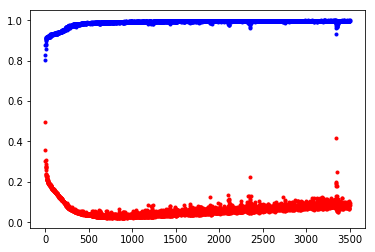

In [18]:
plt.plot(np.arange(len(y_acc)), y_vloss, 'o', c='red', markersize=3)
plt.plot(np.arange(len(y_acc)), y_acc, 'o', c='blue', markersize=3)

In [19]:
#학습셋의 정화도는 시간이 흐를수록 좋아집니다
#테스트셋의 결과는 어느 정도 시간이 흐르면 더 나아지지 않습니다

## Early Stopping
- 과적합 방지

In [21]:
#keras EarlyStoppin()함수에 모니터할 값과 몇번을 기다릴지를 지정
early_stopping_callback = EarlyStopping(monitor='val_loss', \
                                       patience=100)

In [23]:
sample = df_pre.sample(frac=0.15)
s_X = sample.values[:, 0:12]
s_Y = sample.values[:, 12]

s_model2 = Sequential()

s_model2.add(Dense(30, input_dim=12, activation='relu'))
s_model2.add(Dense(12, activation='relu'))
s_model2.add(Dense(8, activation='relu'))
s_model2.add(Dense(1, activation='sigmoid'))

s_model2.compile(loss='binary_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

s_model.fit(s_X, s_Y, \
            validation_split=0.33,\
            epochs=3500,\
            batch_size=500,\
           callbacks=[check_pointer, early_stopping_callback])

Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 0s - loss: 0.0804 - acc: 0.9832 - val_loss: 0.0835 - val_acc: 0.9814
Epoch 2/3500
653/653 [==============================] - 0s - loss: 0.0795 - acc: 0.9847 - val_loss: 0.0731 - val_acc: 0.9845
Epoch 3/3500
653/653 [==============================] - 0s - loss: 0.0706 - acc: 0.9847 - val_loss: 0.0650 - val_acc: 0.9876
Epoch 4/3500
653/653 [==============================] - 0s - loss: 0.0802 - acc: 0.9786 - val_loss: 0.0615 - val_acc: 0.9876
Epoch 5/3500
653/653 [==============================] - 0s - loss: 0.0809 - acc: 0.9816 - val_loss: 0.0636 - val_acc: 0.9783
Epoch 6/3500
653/653 [==============================] - 0s - loss: 0.0708 - acc: 0.9862 - val_loss: 0.0632 - val_acc: 0.9783
Epoch 7/3500
653/653 [==============================] - 0s - loss: 0.0687 - acc: 0.9847 - val_loss: 0.0686 - val_acc: 0.9783
Epoch 8/3500
653/653 [==============================] - 0s - loss: 0.0722 - acc

653/653 [==============================] - 0s - loss: 0.0655 - acc: 0.9893 - val_loss: 0.0761 - val_acc: 0.9783
Epoch 33/3500
653/653 [==============================] - 0s - loss: 0.0615 - acc: 0.9862 - val_loss: 0.0985 - val_acc: 0.9720
Epoch 34/3500
653/653 [==============================] - 0s - loss: 0.0790 - acc: 0.9832 - val_loss: 0.0884 - val_acc: 0.9783
Epoch 35/3500
653/653 [==============================] - 0s - loss: 0.0580 - acc: 0.9893 - val_loss: 0.0757 - val_acc: 0.9845
Epoch 36/3500
653/653 [==============================] - 0s - loss: 0.0594 - acc: 0.9862 - val_loss: 0.0992 - val_acc: 0.9720
Epoch 37/3500
653/653 [==============================] - 0s - loss: 0.0818 - acc: 0.9786 - val_loss: 0.0849 - val_acc: 0.9783
Epoch 38/3500
653/653 [==============================] - 0s - loss: 0.0540 - acc: 0.9893 - val_loss: 0.1009 - val_acc: 0.9783
Epoch 39/3500
653/653 [==============================] - 0s - loss: 0.0760 - acc: 0.9862 - val_loss: 0.0954 - val_acc: 0.9783
Epoch 

653/653 [==============================] - 0s - loss: 0.0531 - acc: 0.9877 - val_loss: 0.0848 - val_acc: 0.9783
Epoch 64/3500
653/653 [==============================] - 0s - loss: 0.0478 - acc: 0.9908 - val_loss: 0.0936 - val_acc: 0.9783
Epoch 65/3500
653/653 [==============================] - 0s - loss: 0.0554 - acc: 0.9893 - val_loss: 0.0925 - val_acc: 0.9783
Epoch 66/3500
653/653 [==============================] - 0s - loss: 0.0536 - acc: 0.9908 - val_loss: 0.0881 - val_acc: 0.9720
Epoch 67/3500
653/653 [==============================] - 0s - loss: 0.0489 - acc: 0.9908 - val_loss: 0.0890 - val_acc: 0.9752
Epoch 68/3500
653/653 [==============================] - 0s - loss: 0.0563 - acc: 0.9893 - val_loss: 0.0886 - val_acc: 0.9720
Epoch 69/3500
653/653 [==============================] - 0s - loss: 0.0467 - acc: 0.9893 - val_loss: 0.1032 - val_acc: 0.9752
Epoch 70/3500
653/653 [==============================] - 0s - loss: 0.0609 - acc: 0.9893 - val_loss: 0.0949 - val_acc: 0.9752
Epoch 

653/653 [==============================] - 0s - loss: 0.0485 - acc: 0.9908 - val_loss: 0.0905 - val_acc: 0.9720
Epoch 95/3500
653/653 [==============================] - 0s - loss: 0.0485 - acc: 0.9893 - val_loss: 0.0910 - val_acc: 0.9720
Epoch 96/3500
653/653 [==============================] - 0s - loss: 0.0474 - acc: 0.9908 - val_loss: 0.0945 - val_acc: 0.9783
Epoch 97/3500
653/653 [==============================] - 0s - loss: 0.0483 - acc: 0.9908 - val_loss: 0.0918 - val_acc: 0.9783
Epoch 98/3500
653/653 [==============================] - 0s - loss: 0.0459 - acc: 0.9908 - val_loss: 0.0917 - val_acc: 0.9752
Epoch 99/3500
653/653 [==============================] - 0s - loss: 0.0480 - acc: 0.9893 - val_loss: 0.0945 - val_acc: 0.9752
Epoch 100/3500
653/653 [==============================] - 0s - loss: 0.0467 - acc: 0.9908 - val_loss: 0.0983 - val_acc: 0.9752
Epoch 101/3500
653/653 [==============================] - 0s - loss: 0.0470 - acc: 0.9908 - val_loss: 0.0921 - val_acc: 0.9720
Epoc